In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the data
df = pd.read_csv("Dataset/diabetic_data_training.csv")

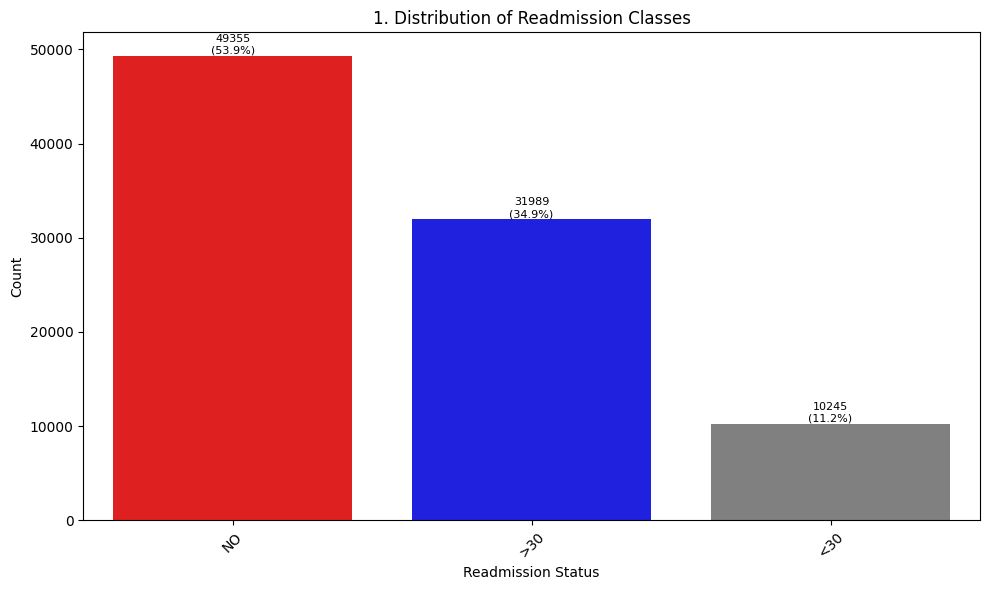

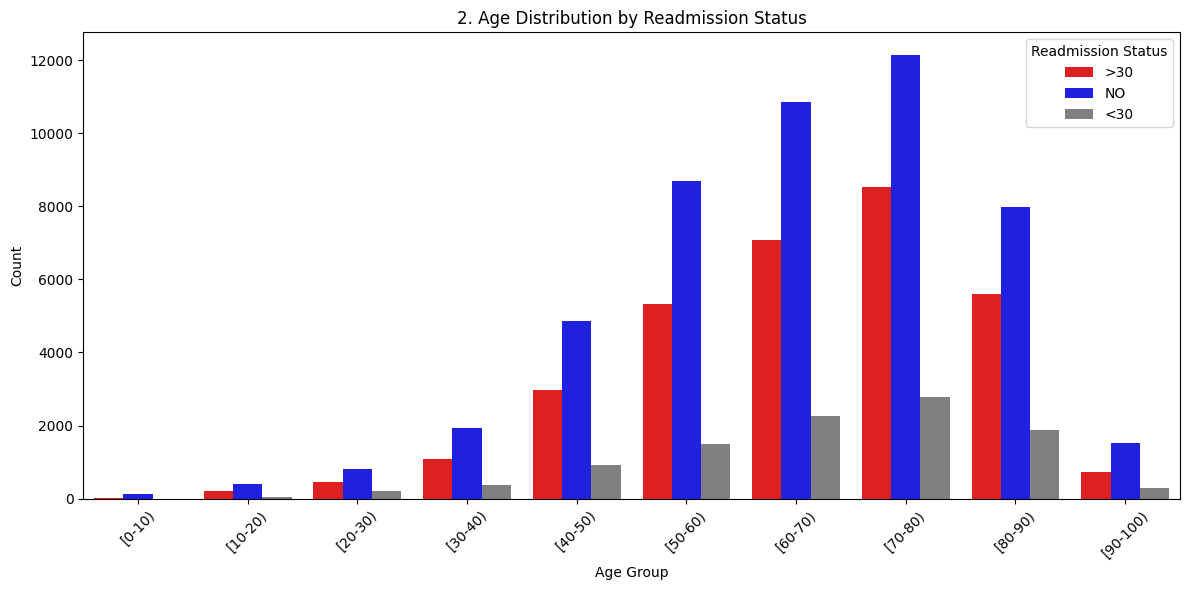

<Figure size 800x600 with 0 Axes>

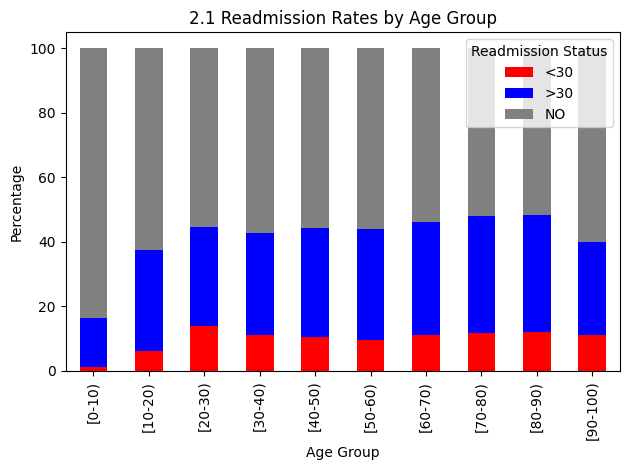

<Figure size 800x600 with 0 Axes>

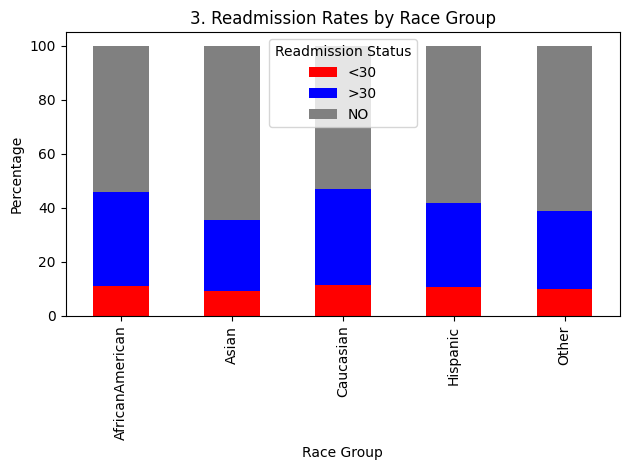

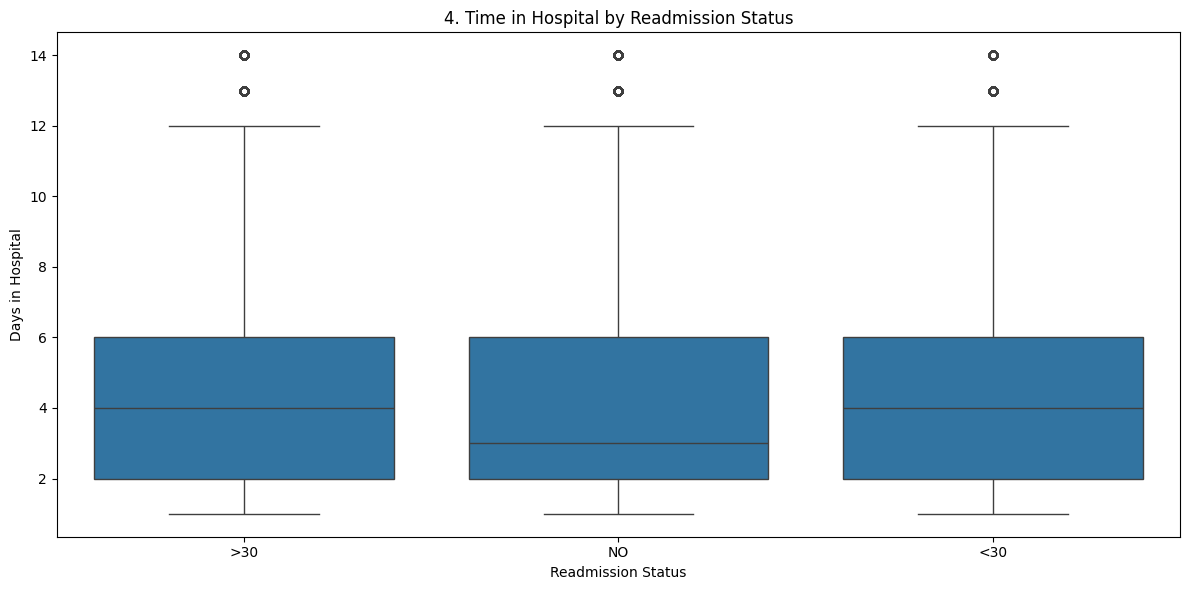

<Figure size 800x600 with 0 Axes>

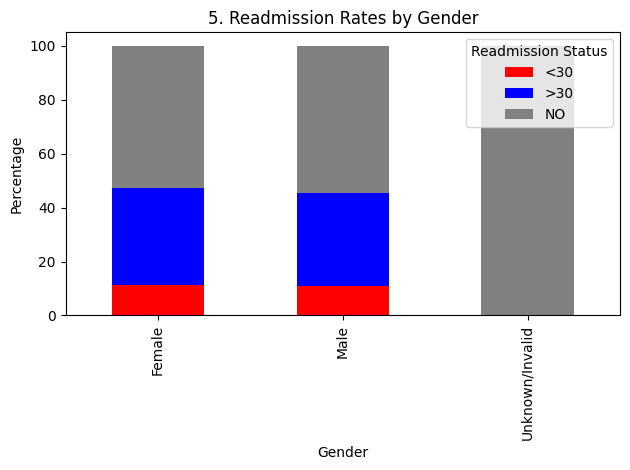

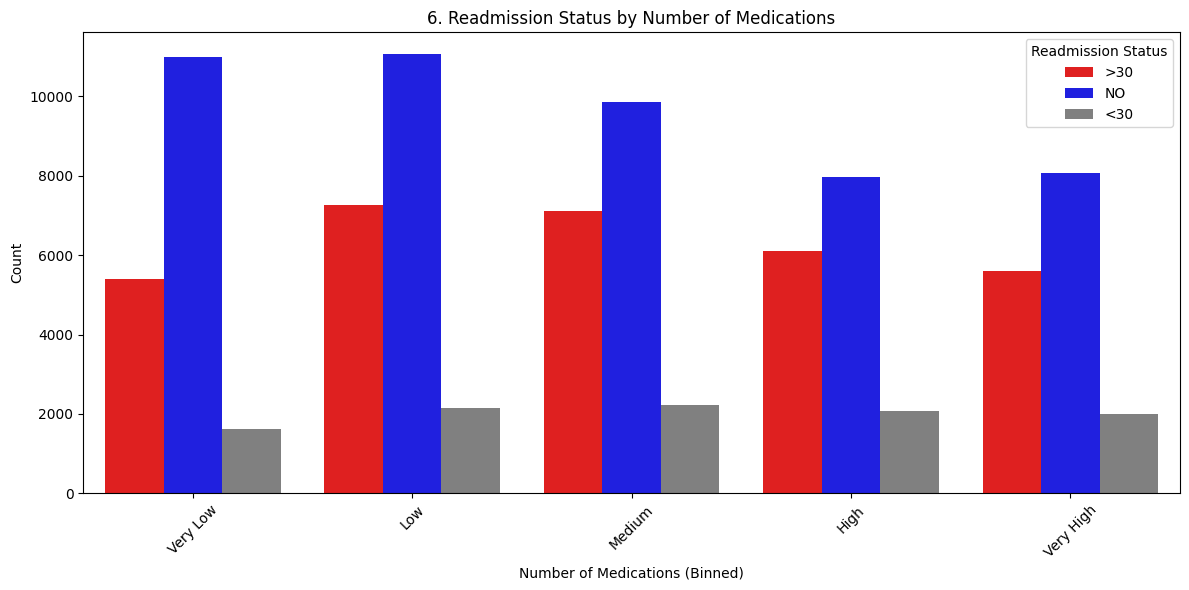

<Figure size 800x600 with 0 Axes>

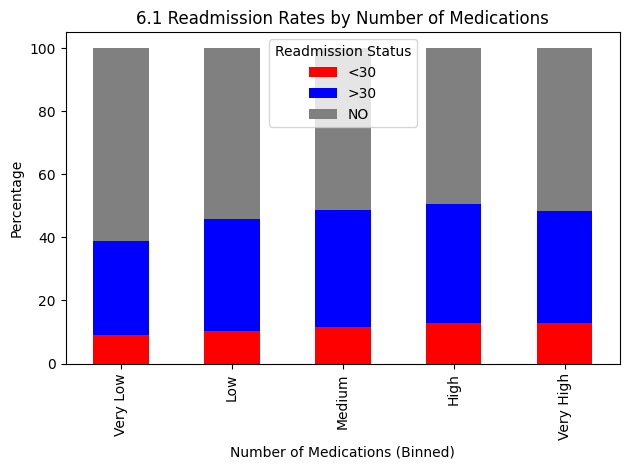

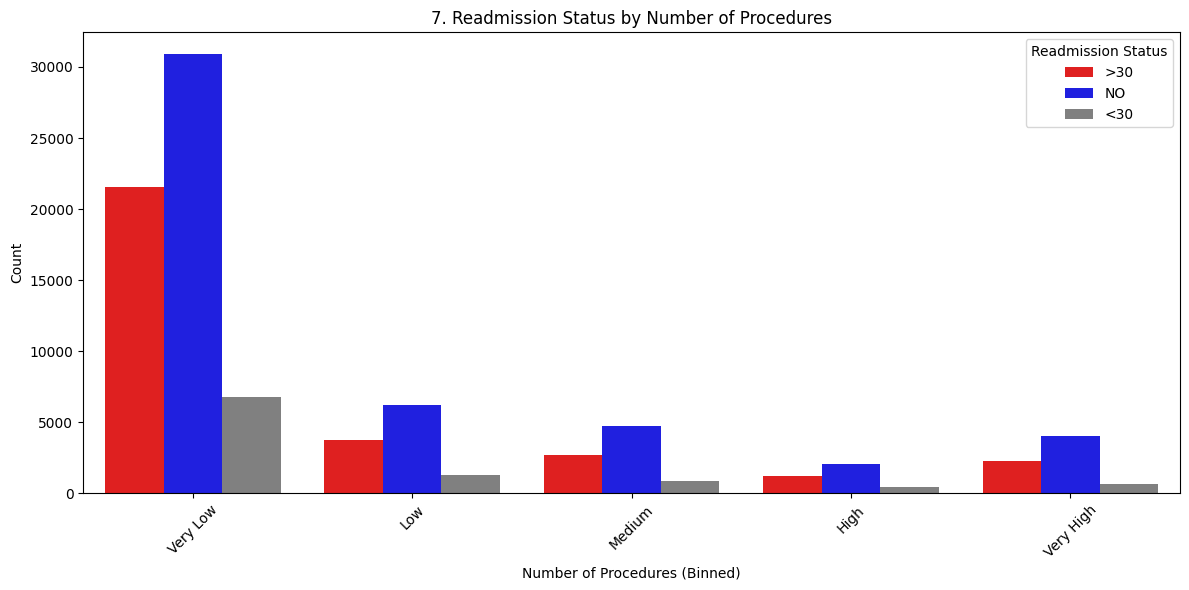

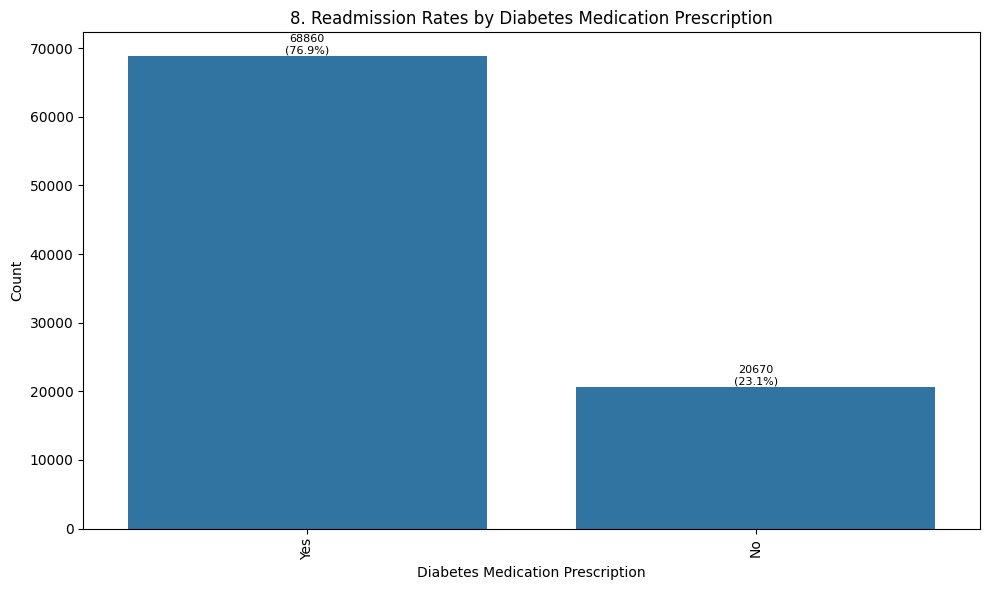

<Figure size 800x600 with 0 Axes>

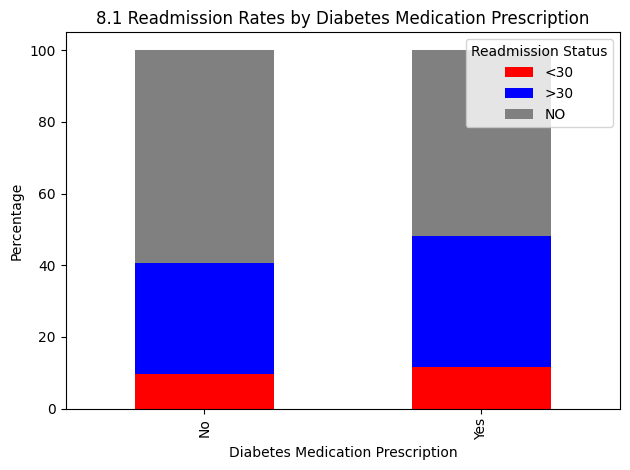

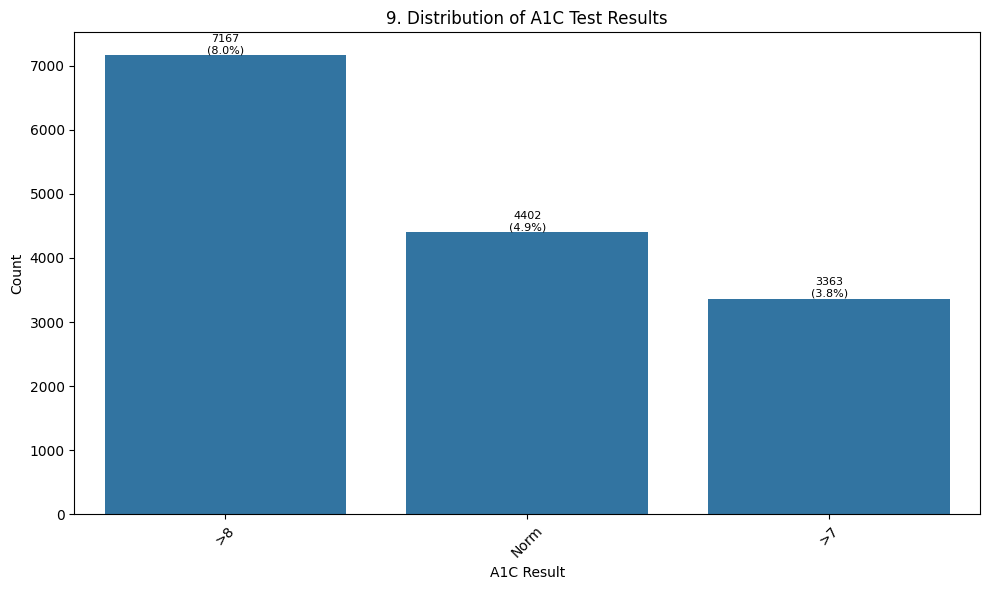

<Figure size 800x600 with 0 Axes>

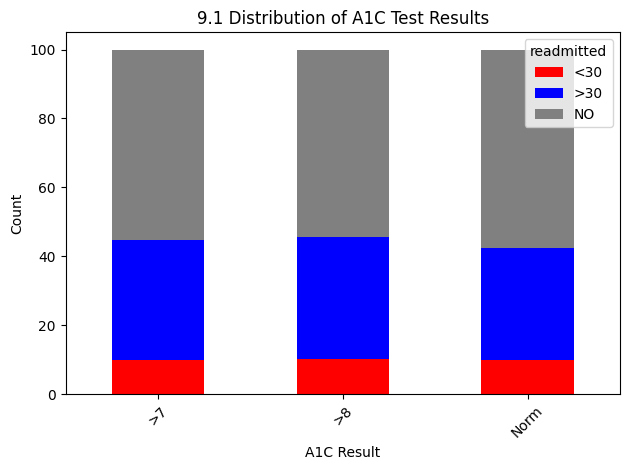

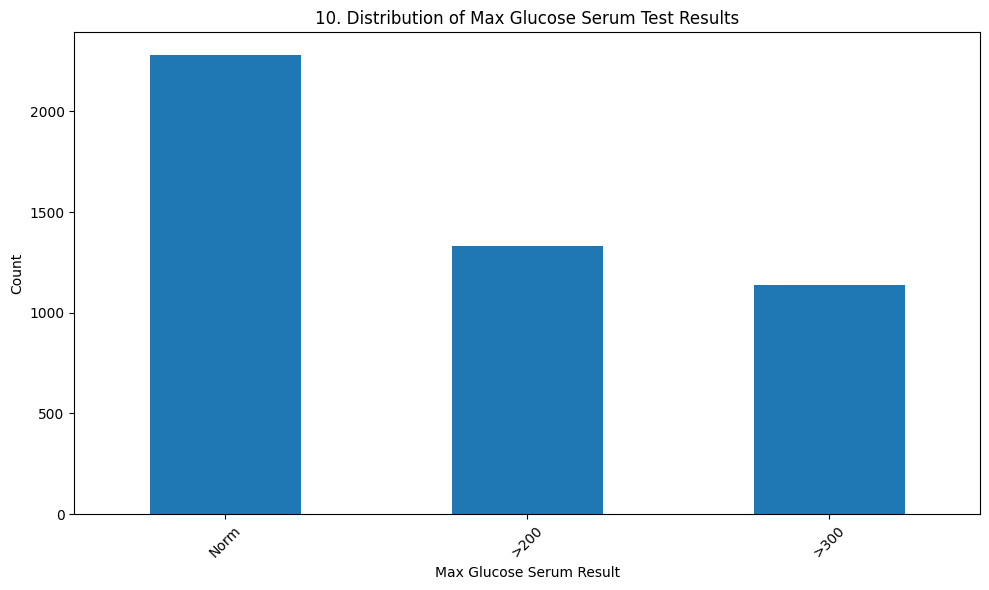

<Figure size 800x600 with 0 Axes>

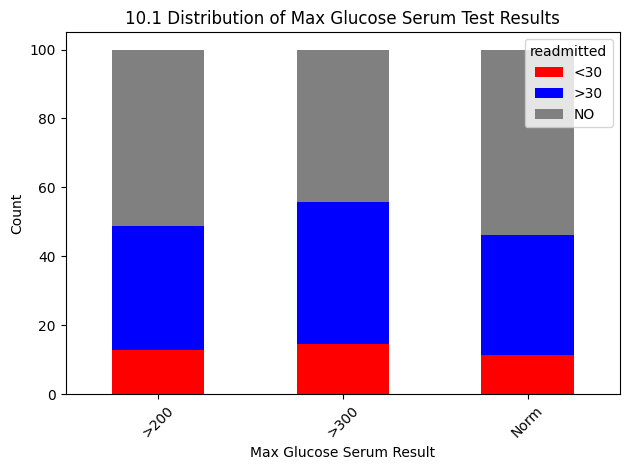

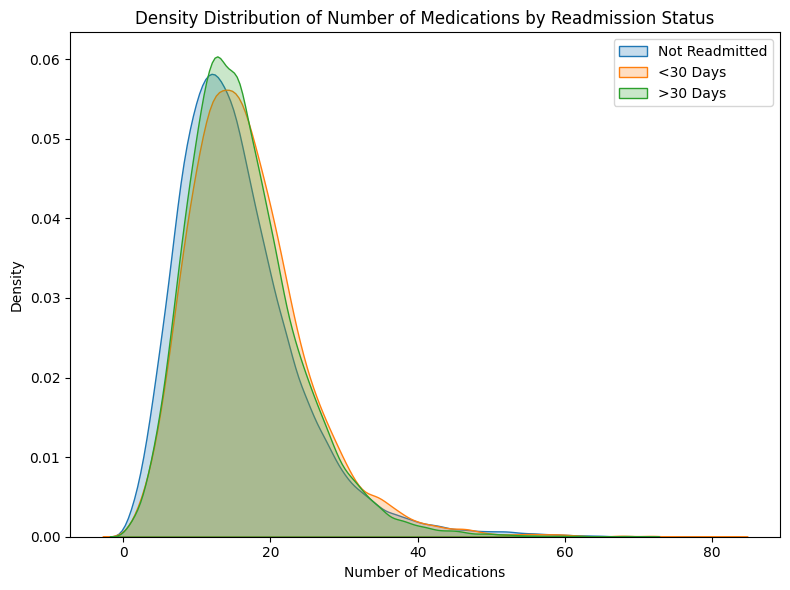

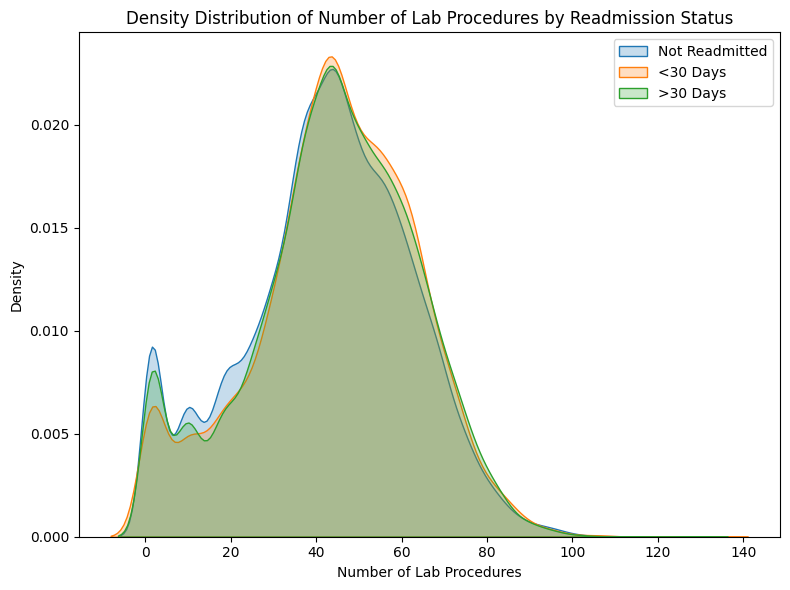

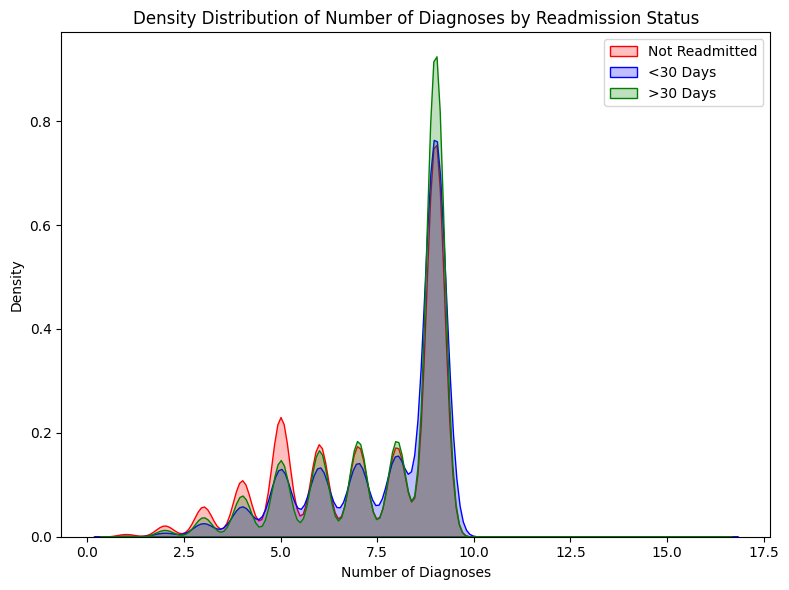

{'total_patients': 91589,
 'readmission_rates': readmitted
 NO     53.887476
 >30    34.926683
 <30    11.185841
 Name: proportion, dtype: float64,
 'avg_time_in_hospital': 4.395549683914007,
 'avg_num_medications': 16.018135365600674,
 'avg_num_procedures': 1.3378462479118671,
 'avg_num_diagnoses': 7.422365131183875}

In [15]:
def perform_eda(df):
    # Set styling for better visualizations
    #plt.style.use('seaborn-dark')

    # Set consistent color palette
    colors = ['red', 'blue', 'grey']  # Define colors for non-readmitted and readmitted

    # 1. Distribution of Readmission Classes
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='readmitted', order=df['readmitted'].value_counts().index, palette =  colors)
    # Calculate percentages and counts
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
    
    plt.title('1. Distribution of Readmission Classes')
    plt.xlabel('Readmission Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

    # 2. Age Distribution Analysis
    plt.figure(figsize=(12, 6))
    age_order = sorted(df['age'].unique())
    sns.countplot(data=df, x='age', order=age_order, hue='readmitted', palette = colors)
    plt.title('2. Age Distribution by Readmission Status')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    # 2.1 Age Distribution Stacked
    plt.figure(figsize=(8, 6))
    age_readmit = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100
    age_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('2.1 Readmission Rates by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 3 Race Distribution
    # Remove rows where the 'race' column has '?'
    df = df[df['race'] != '?']

    plt.figure(figsize=(8, 6))
    race_readmit = pd.crosstab(df['race'], df['readmitted'], normalize='index') * 100
    race_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('3. Readmission Rates by Race Group')
    plt.xlabel('Race Group')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 4. Time in Hospital Distribution
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='readmitted', y='time_in_hospital')
    plt.title('4. Time in Hospital by Readmission Status')
    plt.xlabel('Readmission Status')
    plt.ylabel('Days in Hospital')
    plt.tight_layout()
    plt.show()
    

    # 5. Gender Distribution Stacked
    plt.figure(figsize=(8, 6))
    gender_readmit = pd.crosstab(df['gender'], df['readmitted'], normalize='index') * 100
    gender_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('5. Readmission Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 6. Number of Medications Analysis
    df['num_medications_bins'] = pd.qcut(df['num_medications'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='num_medications_bins', hue='readmitted', palette = colors)
    plt.title('6. Readmission Status by Number of Medications')
    plt.xlabel('Number of Medications (Binned)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    # 6.1 Number of Medications Analysis Stacked
    plt.figure(figsize=(8, 6))
    meds_readmit = pd.crosstab(df['num_medications_bins'], df['readmitted'], normalize='index') * 100
    meds_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('6.1 Readmission Rates by Number of Medications')
    plt.xlabel('Number of Medications (Binned)')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 7. Number of Procedures Analysis
    #df['num_procedures_bins'] = pd.qcut(df['num_procedures'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    num_procedures_bins = pd.cut(df['num_procedures'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    df['num_procedures_bins'] = num_procedures_bins
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='num_procedures_bins', hue='readmitted', palette = colors)
    plt.title('7. Readmission Status by Number of Procedures')
    plt.xlabel('Number of Procedures (Binned)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 8. Medication Analysis
    plt.figure(figsize=(10, 6))
    top_meds = df['diabetesMed'].value_counts().head(10)
    bx = sns.barplot(x=top_meds.index, y=top_meds.values)
    # Calculate percentages and counts
    total = len(df)
    for p in bx.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        bx.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
        
    plt.title('8. Readmission Rates by Diabetes Medication Prescription')
    plt.xlabel('Diabetes Medication Prescription')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    # 8.1 Medication Analysis
    plt.figure(figsize=(8, 6))
    meds_readmit = pd.crosstab(df['diabetesMed'], df['readmitted'], normalize='index') * 100
    meds_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('8.1 Readmission Rates by Diabetes Medication Prescription')
    plt.xlabel('Diabetes Medication Prescription')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 9. A1C Test Results
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='A1Cresult', order=df['A1Cresult'].value_counts().index)
    # Calculate percentages and counts
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
        
    plt.title('9. Distribution of A1C Test Results')
    plt.xlabel('A1C Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 
    # 9.1 A1C Test Results
    plt.figure(figsize=(8, 6))
    a1c_readmit = pd.crosstab(df['A1Cresult'], df['readmitted'], normalize='index') * 100
    a1c_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('9.1 Distribution of A1C Test Results')
    plt.xlabel('A1C Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 


    # 10. Max Glucose Serum Test Results
    plt.figure(figsize=(10, 6))
    glucose_counts = df['max_glu_serum'].value_counts()
    glucose_counts.plot(kind='bar')
    plt.title('10. Distribution of Max Glucose Serum Test Results')
    plt.xlabel('Max Glucose Serum Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # 10.1 Max Glucose Serum Test Results
    plt.figure(figsize=(8, 6))
    glucose_readmit = pd.crosstab(df['max_glu_serum'], df['readmitted'], normalize='index') * 100
    glucose_readmit.plot(kind='bar', stacked=True, color = colors)
    plt.title('10.1 Distribution of Max Glucose Serum Test Results')
    plt.xlabel('Max Glucose Serum Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 11. Number of Diagnoses Analysis
    # 12. Number of Outpatients Analysis
    # 13. Number of Emergency Visits Analysis
    # 14. Number of Lab Procedures Analysis

def dense_plt():
    df['readmission_category'] = 'Not Readmitted'
    df.loc[df['readmitted'] != 'NO', 'readmission_category'] = 'Readmitted'
    df.loc[(df['readmitted'] != 'NO') & (df['time_in_hospital'] < 30), 'readmission_category'] = '<30 Days'
    df.loc[(df['readmitted'] != 'NO') & (df['time_in_hospital'] >= 30), 'readmission_category'] = '>30 Days'

    # Number of Medications
    plt.figure(figsize=(8, 6))
    #for category in df['readmission_category'].unique():
    #    sns.kdeplot(data=df[df['readmission_category'] == category], x="num_medications", shade=True, label=category)    
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="num_medications", shade=True, label="Not Readmitted")
    sns.kdeplot(data=df[df['readmitted'] == '<30'], x="num_medications", shade=True, label="<30 Days")
    sns.kdeplot(data=df[df['readmitted'] == '>30'], x="num_medications", shade=True, label=">30 Days")
    plt.title("Density Distribution of Number of Medications by Readmission Status")
    plt.xlabel("Number of Medications")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    #plt.savefig("num_medications_density.png")
    plt.show()

    # Number of Lab Procedures
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="num_lab_procedures", shade=True, label="Not Readmitted")
    sns.kdeplot(data=df[df['readmitted'] == '<30'], x="num_lab_procedures", shade=True, label="<30 Days")
    sns.kdeplot(data=df[df['readmitted'] == '>30'], x="num_lab_procedures", shade=True, label=">30 Days")
    plt.title("Density Distribution of Number of Lab Procedures by Readmission Status")
    plt.xlabel("Number of Lab Procedures")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Number of Diagnoses
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="number_diagnoses", shade=True, label="Not Readmitted", color='red')
    sns.kdeplot(data=df[df['readmitted'] == '<30'], x="number_diagnoses", shade=True, label="<30 Days", color='blue')
    sns.kdeplot(data=df[df['readmitted'] == '>30'], x="number_diagnoses", shade=True, label=">30 Days", color='green')
    plt.title("Density Distribution of Number of Diagnoses by Readmission Status")
    plt.xlabel("Number of Diagnoses")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Create summary statistics
    summary_stats = {
        'total_patients': len(df),
        'readmission_rates': df['readmitted'].value_counts(normalize=True) * 100,
        'avg_time_in_hospital': df['time_in_hospital'].mean(),
        'avg_num_medications': df['num_medications'].mean(),
        'avg_num_procedures': df['num_procedures'].mean(),
        'avg_num_diagnoses': df['number_diagnoses'].mean()
    }
    
    return summary_stats




# Function to analyze missing values
def analyze_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    
    if len(missing_values) > 0:
        plt.figure(figsize=(12, 6))
        missing_values.plot(kind='bar')
        plt.title('Missing Values by Feature')
        plt.xlabel('Features')
        plt.ylabel('Number of Missing Values')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return missing_values

# analyze_missing_values(df)
perform_eda(df)
dense_plt()

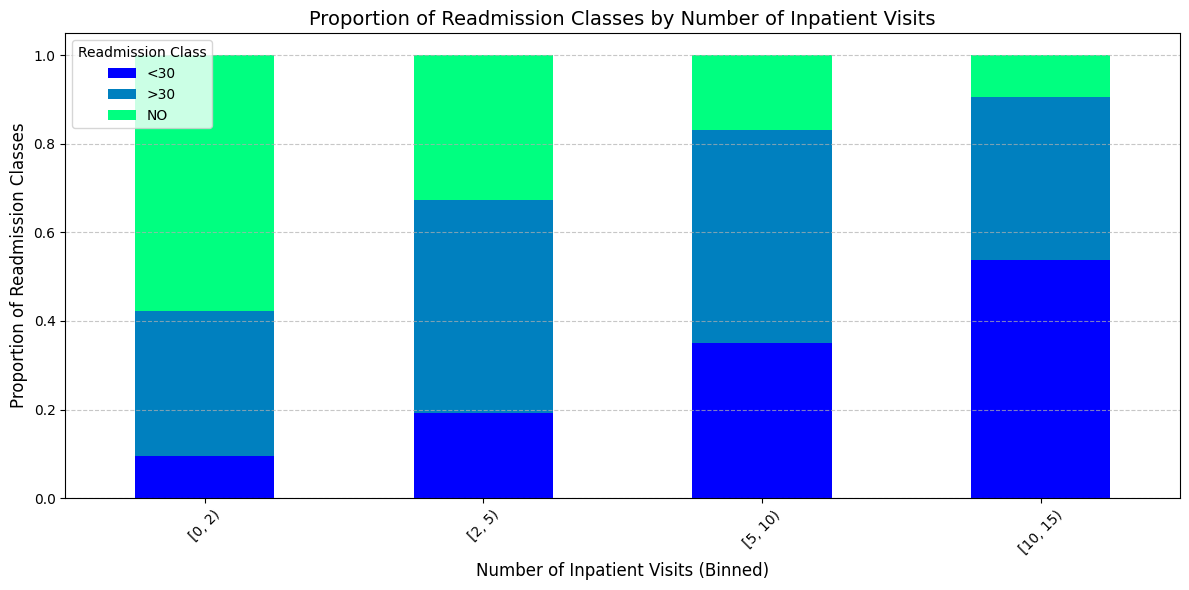

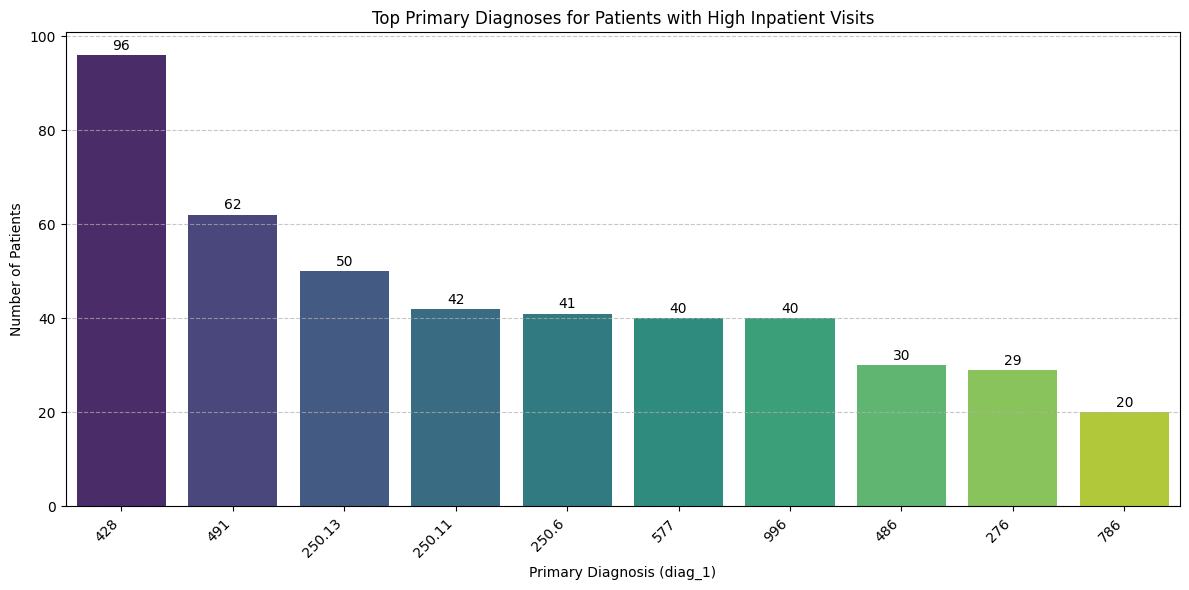

In [16]:
df['visit_bins'] = pd.cut(df['number_inpatient'], bins=[0, 2, 5, 10, 15], right=False)

# Calculate proportions of readmission classes within each bin
proportions = df.groupby(['visit_bins', 'readmitted']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plot the stacked bar chart
proportions_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='winter')

# Customize the plot
plt.title("Proportion of Readmission Classes by Number of Inpatient Visits", fontsize=14)
plt.xlabel("Number of Inpatient Visits (Binned)", fontsize=12)
plt.ylabel("Proportion of Readmission Classes", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Readmission Class", fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()
######################################




########################################
# Filter rows with high inpatient visits (e.g., number_inpatient > threshold)
threshold = 5
high_inpatient_visits = df[df['number_inpatient'] > threshold]

# Grouping by primary diagnosis and counting the occurrences
primary_diagnosis_counts = high_inpatient_visits['diag_1'].value_counts()

# Extracting the top primary diagnoses for clarity in the visualization
top_diagnoses = primary_diagnosis_counts.head(10)

# Creating the plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_diagnoses.index, y=top_diagnoses.values, palette="viridis")

# Annotate each bar with the count
for i, value in enumerate(top_diagnoses.values):
    bar_plot.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Top Primary Diagnoses for Patients with High Inpatient Visits")
plt.xlabel("Primary Diagnosis (diag_1)")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

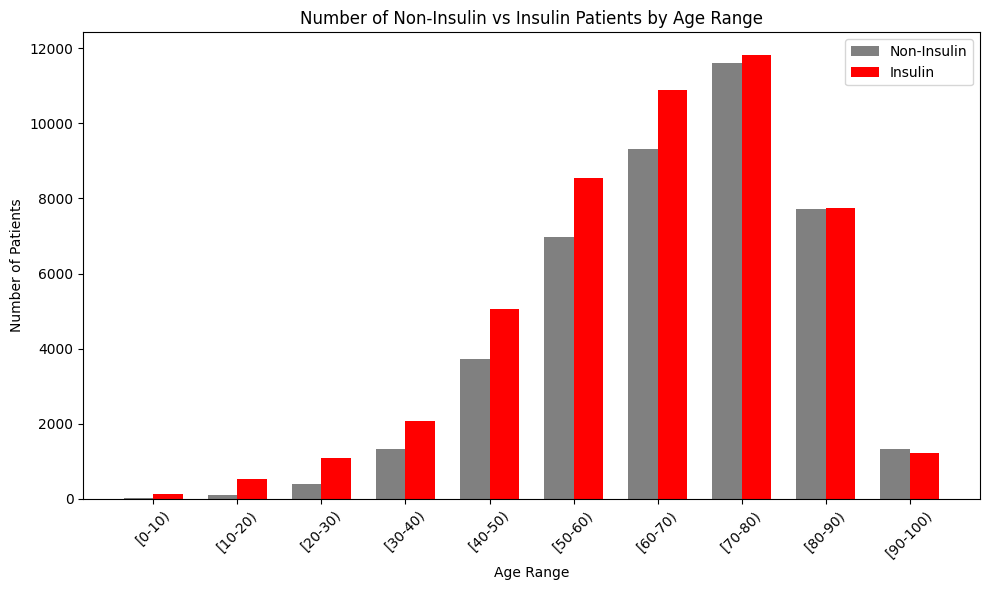

In [17]:
# Categorize insulin into "Insulin" and "Non-Insulin"
df['insulin_category'] = df['insulin'].apply(lambda x: "Non-Insulin" if x == "No" else "Insulin")

# Group by age and insulin_category
grouped = df.groupby(['age', 'insulin_category']).size().unstack(fill_value=0)

# Extracting data
ages = grouped.index
insulin_counts = grouped["Insulin"]
non_insulin_counts = grouped["Non-Insulin"]

# Defining bar positions
x = np.arange(len(ages))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar charts
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, non_insulin_counts, width, label='Non-Insulin', color='grey')
bar2 = ax.bar(x + width/2, insulin_counts, width, label='Insulin', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Patients')
ax.set_title('Number of Non-Insulin vs Insulin Patients by Age Range')
ax.set_xticks(x)
ax.set_xticklabels(ages, rotation=45)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

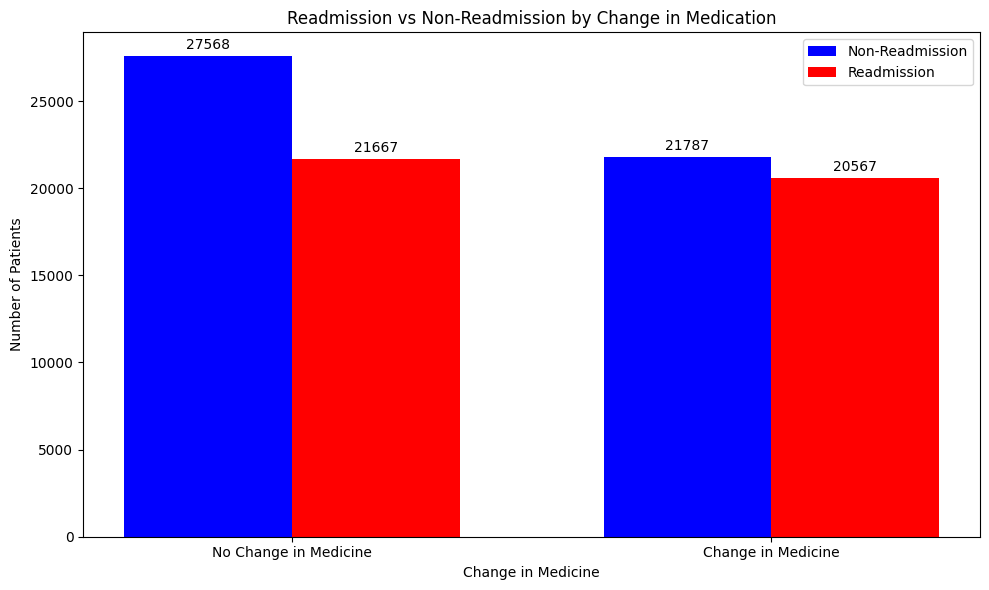

In [18]:
# Convert 'Yes'/'No' to 1/0 in 'change' and 'readmitted' columns
df['change'] = df['change'].replace({'Ch': 1, 'No': 0})
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 1, 'NO': 0})

# Grouping data by 'change' and 'readmitted' to count the occurrences
grouped_data = df.groupby(['change', 'readmitted']).size().unstack(fill_value=0)

'''
# Extracting counts for visualization
change_readmitted = grouped_data.loc[1, :] if 1 in grouped_data.index else [0, 0]
no_change_readmitted = grouped_data.loc[0, :] if 0 in grouped_data.index else [0, 0]

categories = ['Readmission', 'Non-Readmission']
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
        
bar1 = ax.bar(x - width/2, change_readmitted, width, label='Change in Medicine')
bar2 = ax.bar(x + width/2, no_change_readmitted, width, label='No Change in Medicine')

# Adding labels, title, and legend
ax.set_xlabel('Category')
ax.set_ylabel('Number of Patients')
ax.set_title('Readmission vs Non-Readmission by Change in Medication')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding counts on the bars
ax.bar_label(bar1, labels=change_readmitted.astype(int), padding=1)
ax.bar_label(bar2, labels=no_change_readmitted.astype(int), padding=1)
# Display the chart
plt.tight_layout()
plt.show()
'''


# Extracting counts for visualization
change_labels = ['No Change in Medicine', 'Change in Medicine']
no_readmission_counts = grouped_data[0].values  # Non-readmission counts
readmission_counts = grouped_data[1].values  # Readmission counts

# Creating the bar chart
x = np.arange(len(change_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, no_readmission_counts, width, label='Non-Readmission', color = 'blue')
bar2 = ax.bar(x + width/2, readmission_counts, width, label='Readmission', color = 'red')

# Adding labels, title, and legend
ax.set_xlabel('Change in Medicine')
ax.set_ylabel('Number of Patients')
ax.set_title('Readmission vs Non-Readmission by Change in Medication')
ax.set_xticks(x)
ax.set_xticklabels(change_labels)
ax.legend()

# Adding counts on the bars
ax.bar_label(bar1, labels=no_readmission_counts.astype(int), padding=3)
ax.bar_label(bar2, labels=readmission_counts.astype(int), padding=3)

# Display the chart
plt.tight_layout()
plt.show()

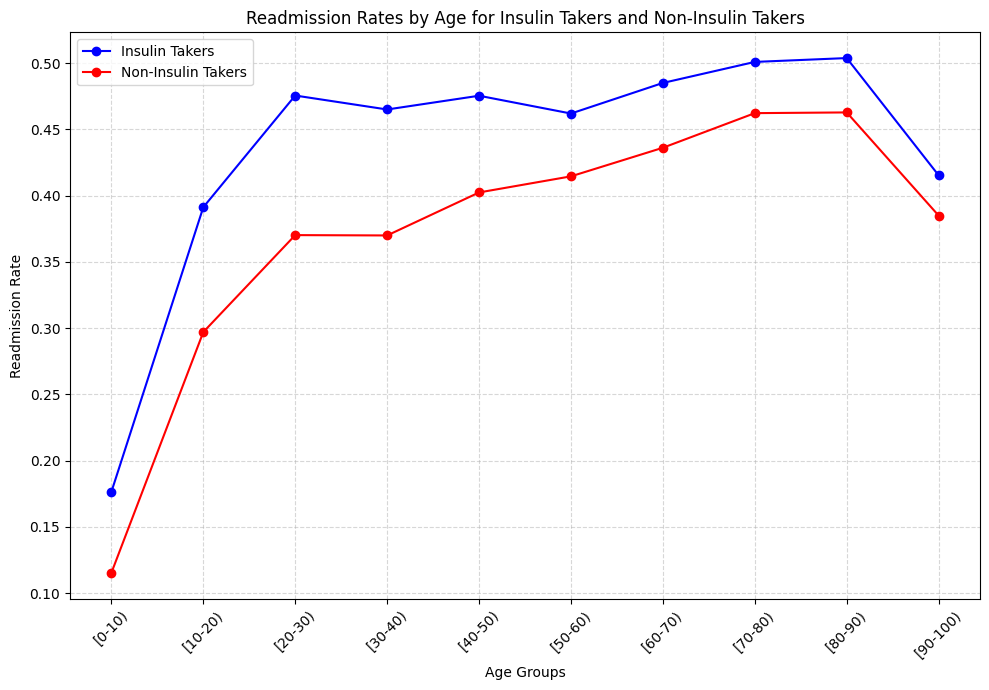

In [19]:
# Replace 'Yes'/'No' in 'readmitted' and 'insulin' columns for numerical analysis
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 1, 'NO': 0})
df['insulin'] = df['insulin'].replace({'Up': 1, 'Steady': 1, 'Down':1, 'No': 0})

# Group by 'age', 'insulin', and 'readmitted', then calculate the percentage of readmissions
age_readmission_insulin = df.groupby(['age', 'insulin', 'readmitted']).size().unstack(fill_value=0)
age_readmission_insulin['Readmission_Rate'] = age_readmission_insulin[1] / (age_readmission_insulin[0] + age_readmission_insulin[1])

# Separate data for insulin takers and non-takers
insulin_takers = age_readmission_insulin.xs(1, level='insulin')['Readmission_Rate']
non_insulin_takers = age_readmission_insulin.xs(0, level='insulin')['Readmission_Rate']

# Define age groups for the x-axis
age_groups = insulin_takers.index

# Plotting the graph
plt.figure(figsize=(10, 7))

# Line plot for insulin takers and non-takers
plt.plot(age_groups, insulin_takers, color='blue', marker='o', label='Insulin Takers')
plt.plot(age_groups, non_insulin_takers, color='red', marker='o', label='Non-Insulin Takers')

# Adding labels, legends, and titles
plt.xlabel('Age Groups')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rates by Age for Insulin Takers and Non-Insulin Takers')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding gridlines for better visibility
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Display the graph
plt.tight_layout()
plt.show()

change
0    44.007312
1    48.559758
Name: readmitted, dtype: float64
change
1    42354
0    49235
Name: count, dtype: int64


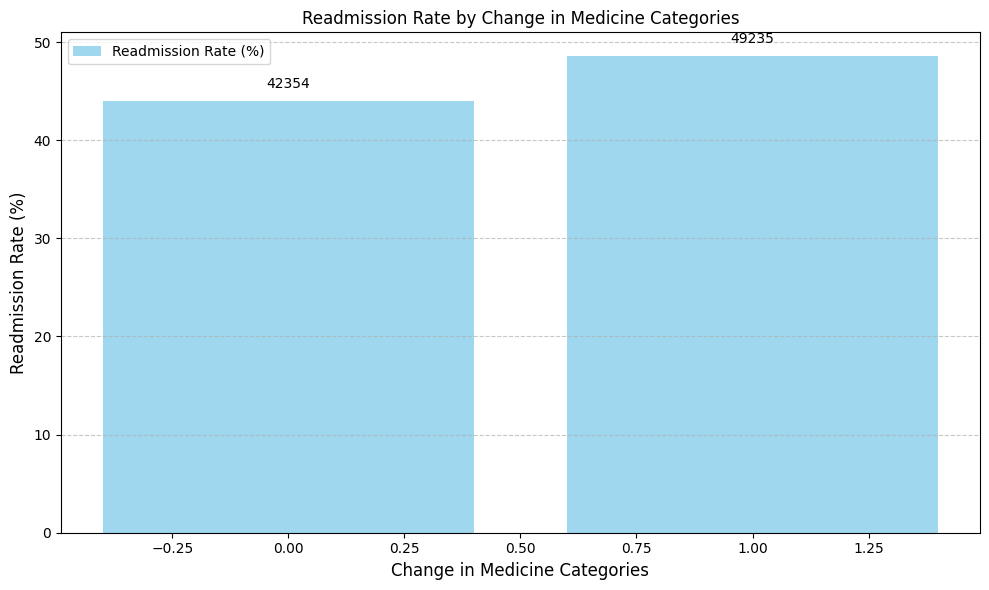

In [20]:
# Replace 'Yes'/'No' in 'readmitted' for numerical analysis
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 1, 'NO': 0})

# Group by 'change' (change in medicine) and calculate the readmission rate
change_readmission = df.groupby('change')['readmitted'].mean() * 100  # Convert to percentage
change_counts = df['change'].value_counts()
# Reverse the order of the output
change_counts = change_counts.iloc[::-1]
print(change_readmission)
print(change_counts)

        


# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar chart for readmission rate
bars = plt.bar(change_readmission.index, change_readmission, color='skyblue', alpha=0.8, label='Readmission Rate (%)')

# Annotate the bar chart with counts
for bar, count in zip(bars, change_counts):
    percentage = f'{100 * count / len(df):.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{count}", ha='center', va='bottom', fontsize=10)

# Adding labels, title, and legend
plt.xlabel('Change in Medicine Categories', fontsize=12)
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.title('Readmission Rate by Change in Medicine Categories', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


race
AfricanAmerican    45.789352
Asian              35.353535
Caucasian          46.968369
Hispanic           41.711809
Other              38.978102
Name: readmitted, dtype: float64


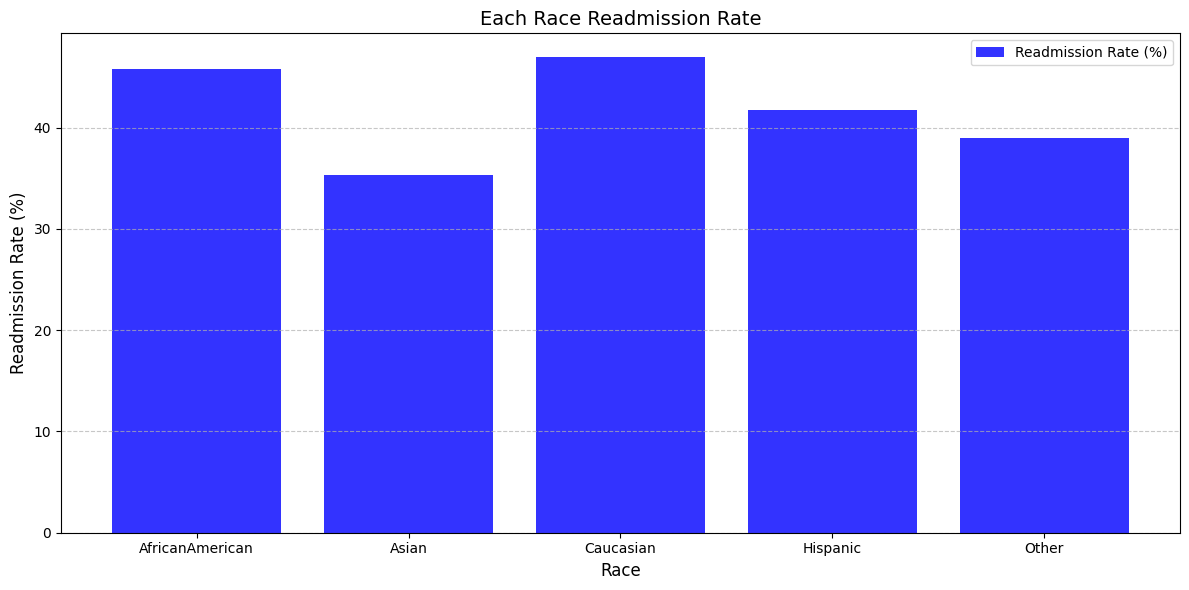

In [21]:
# Remove rows where the 'race' column has '?'
df = df[df['race'] != '?']
# Calculate the percentage of readmission for each race
race_readmission = df.groupby('race')['readmitted'].mean() * 100  # Convert to percentage
race_counts = df['race'].value_counts()
print(race_readmission)

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Bar chart for readmission rate by race
bars = plt.bar(race_readmission.index, race_readmission, color='blue', alpha=0.8, label='Readmission Rate (%)')

# Annotate the bar chart with counts
#for bar, count in zip(bars, race_counts):
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{count}", ha='center', va='bottom', fontsize=10)

# Adding labels, title, and legend
plt.xlabel('Race', fontsize=12)
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.title('Each Race Readmission Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

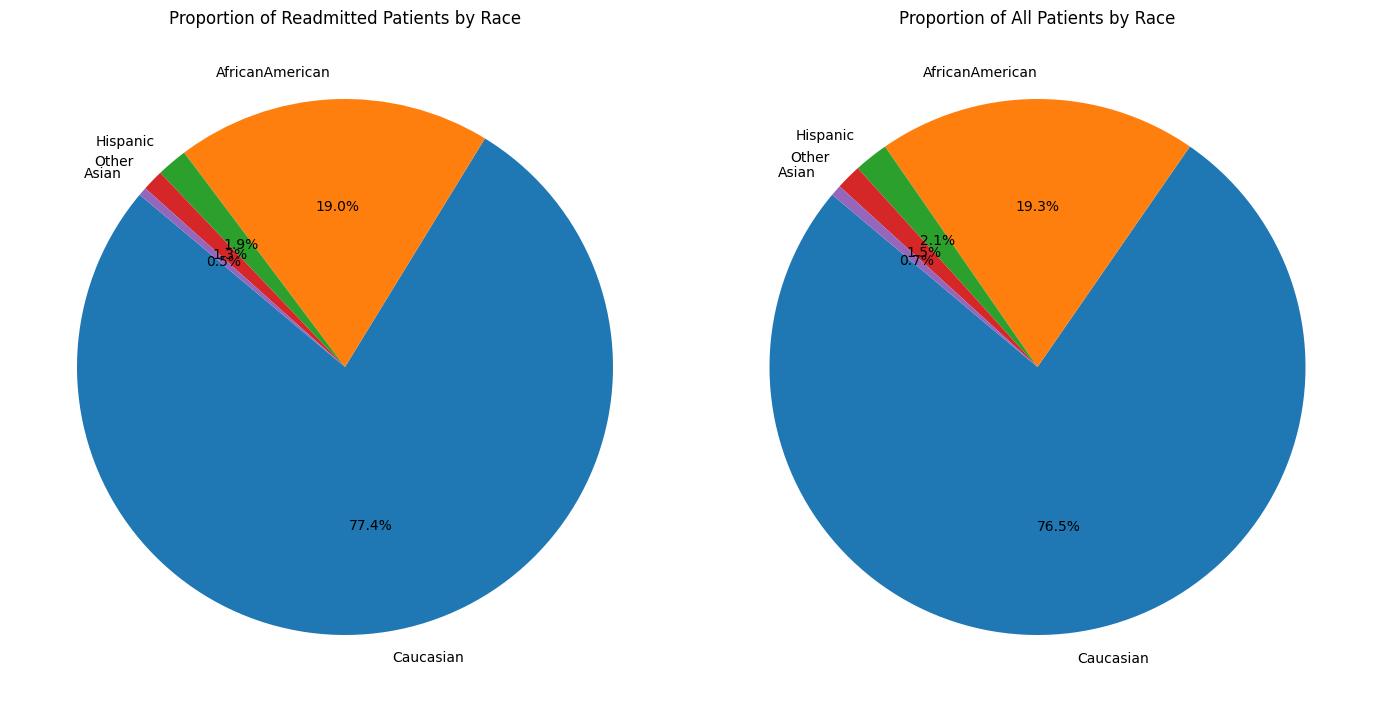

In [22]:
# Filter readmitted patients
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 1, 'NO': 0})
readmitted_patients = df[(df['readmitted'] == 1)]



# Calculate proportions for readmitted patients by race
readmitted_race_counts = readmitted_patients['race'].value_counts()
readmitted_race_proportions = readmitted_race_counts / readmitted_race_counts.sum()


# Calculate overall proportions for all patients by race
total_race_counts = df['race'].value_counts()
total_race_proportions = total_race_counts / total_race_counts.sum()



# Pie chart for readmitted patients by race
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
readmitted_race_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Proportion of Readmitted Patients by Race")
plt.ylabel("")


# Pie chart for all patients by race
plt.subplot(1, 2, 2)
total_race_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Proportion of All Patients by Race")
plt.ylabel("")

plt.tight_layout()
plt.show()

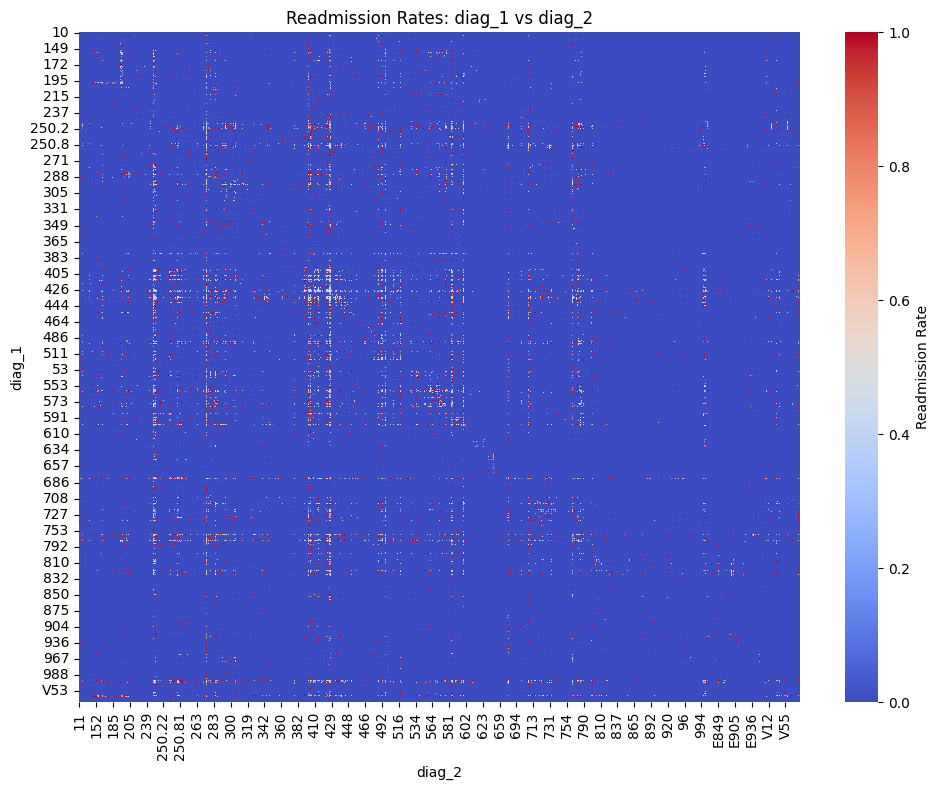

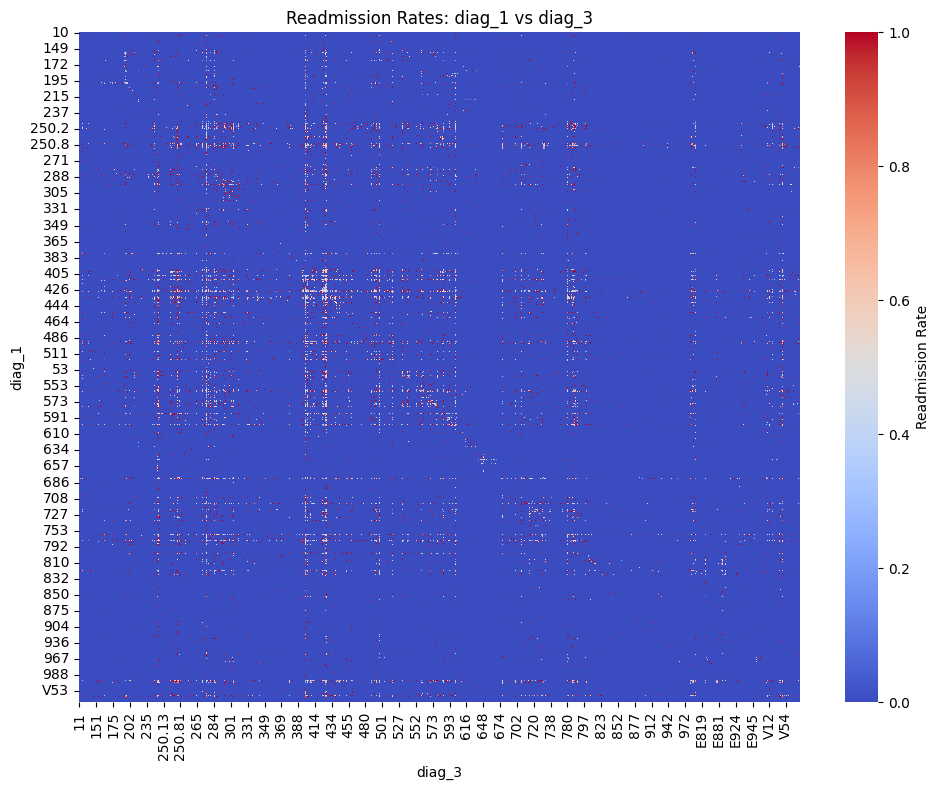

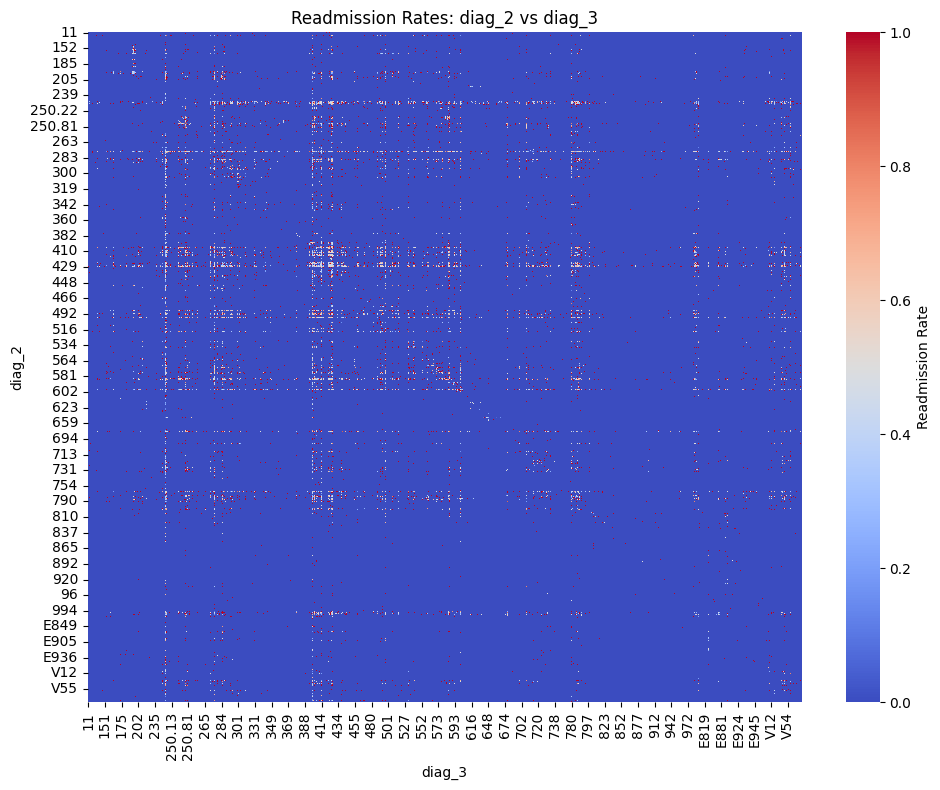

In [23]:
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 1, 'NO': 0})
# Assuming 'readmitted' is already converted to binary: 1 for readmitted, 0 for not readmitted
# Ensure diag_1, diag_2, and diag_3 are categorical
df['diag_1'] = df['diag_1'].astype(str)
df['diag_2'] = df['diag_2'].astype(str)
df['diag_3'] = df['diag_3'].astype(str)

# Function to create a pivot table for two diagnoses
def create_matrix(diag_a, diag_b):
    matrix = df.groupby([diag_a, diag_b])['readmitted'].mean().unstack().fillna(0)
    return matrix

# Create matrices
matrix_diag1_diag2 = create_matrix('diag_1', 'diag_2')
matrix_diag1_diag3 = create_matrix('diag_1', 'diag_3')
matrix_diag2_diag3 = create_matrix('diag_2', 'diag_3')

# Plot heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Readmission Rate'})
    plt.title(title)
    plt.xlabel(matrix.columns.name)
    plt.ylabel(matrix.index.name)
    plt.tight_layout()
    plt.show()

# Visualize the matrices
plot_heatmap(matrix_diag1_diag2, 'Readmission Rates: diag_1 vs diag_2')
plot_heatmap(matrix_diag1_diag3, 'Readmission Rates: diag_1 vs diag_3')
plot_heatmap(matrix_diag2_diag3, 'Readmission Rates: diag_2 vs diag_3')

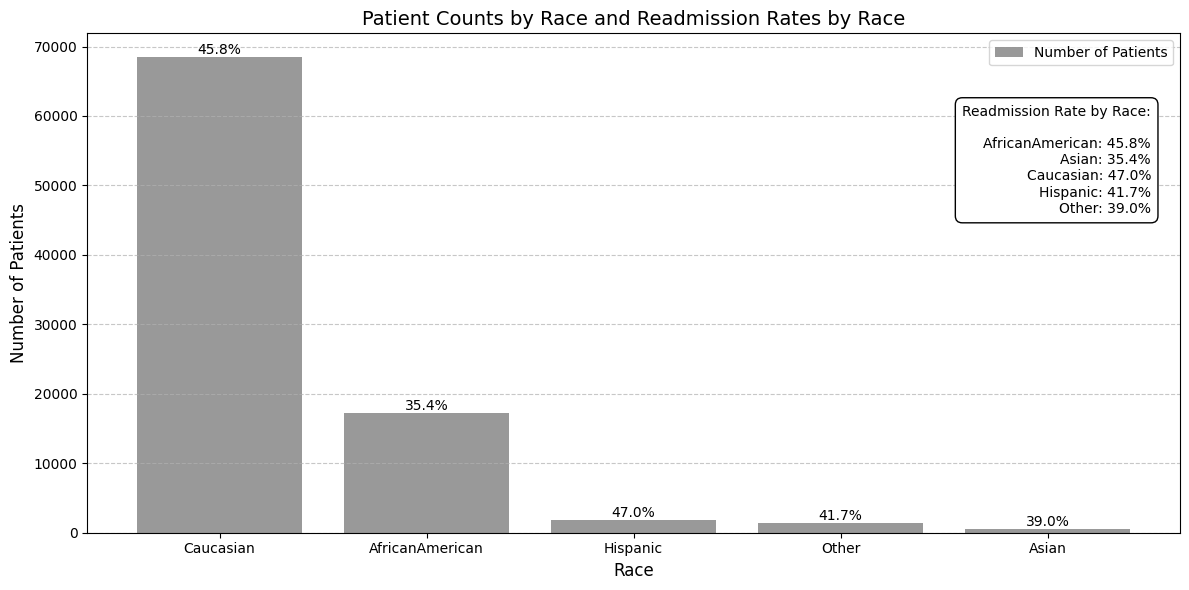

In [43]:
# Calculate the percentage of readmission for each race
race_readmission = df.groupby('race')['readmitted'].mean() * 100  # Convert to percentage
race_counts = df['race'].value_counts()

# Create a string for percentage labels
percentage_labels = ["Readmission Rate by Race:\n"] + [f"{race}: {percentage:.1f}%" for race, percentage in zip(race_readmission.index, race_readmission)]

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Bar chart for the number of patients (counts) by race
bars = plt.bar(race_counts.index, race_counts, color='grey', alpha=0.8, label='Number of Patients')

# Annotate the bar chart with percentages
for bar, percentage in zip(bars, race_readmission):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

# Adding a legend-like text box for percentages
plt.text(
    x=len(race_counts) - 0.5,  # Align it with the last bar
    y=max(race_counts) * 0.9,  # Position slightly below the tallest bar
    s="\n".join(percentage_labels),
    fontsize=10,
    ha='right',
    va='top',
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
)

# Adding labels, title, and legend
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Patient Counts by Race and Readmission Rates by Race', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Number of Patients'], loc='upper right')

# Display the graph
plt.tight_layout()
plt.show()


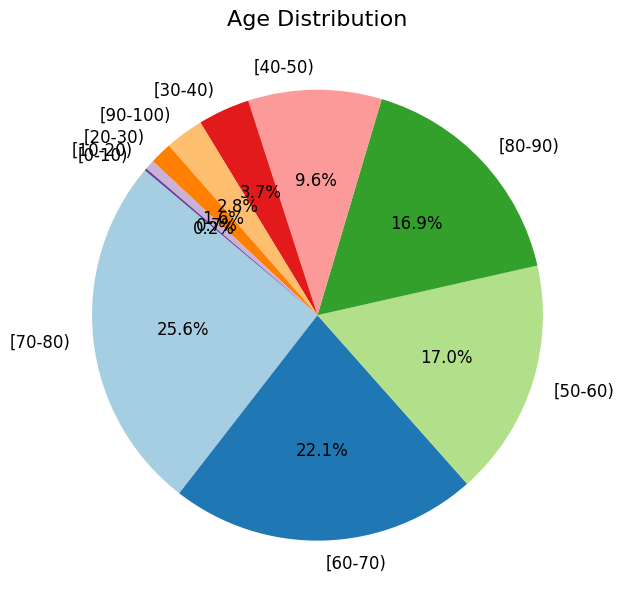

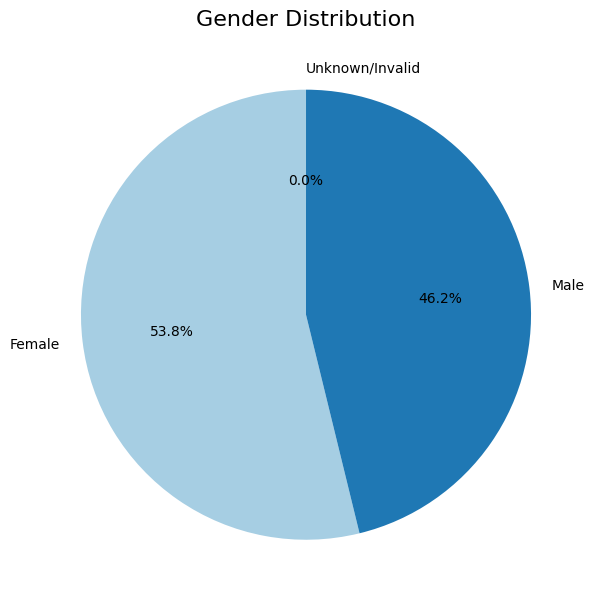

In [28]:
# Calculate age distribution
age_distribution = df['age'].value_counts()

# Calculate gender distribution
gender_distribution = df['gender'].value_counts()


# Age distribution pie chart
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
age_pie = plt.pie(
    age_distribution, 
    labels=age_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 12},
    colors=plt.cm.Paired.colors
)
plt.title('Age Distribution', fontsize=16)

# Gender distribution pie chart
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 2)
gender_pie = plt.pie(
    gender_distribution, 
    labels=gender_distribution.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 10},
    colors=plt.cm.Paired.colors
)
plt.title('Gender Distribution', fontsize=16)

# Display the pie charts
plt.tight_layout()
plt.show()
